<a href="https://colab.research.google.com/github/jkjh23/BusanAIDeveloperCourse_AI_FinalProject/blob/main/Vibration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 불러오기

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# !pip install tensorflow==2.3.0

In [ ]:
# tf.__version__

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from scipy import stats

In [ ]:
df=pd.read_csv('/content/drive/My Drive/2020_AI_Busan/5_FinalProjectData/BearingAccData/LogData_10000.csv', index_col=0 )
df.head()

,X1,Y1,Z1,X2,Y2,Z2
0,0.008789,-0.030029,1.103027,-0.015686,-0.015686,-0.015686
1,0.014160,-0.039062,1.109131,-0.015686,-0.015686,-0.015686
2,0.009766,-0.029541,1.084961,-0.015686,-0.015686,-0.015686
3,0.017334,-0.035400,1.098145,-0.015686,-0.015686,-0.015686
4,0.014648,-0.035645,1.091797,-0.015686,-0.015686,-0.015686


# -0.1 < X1 < 0.1 - FFT

In [ ]:
df['scaled']=df.X1.map(lambda x : 1.1 if x > 1.1 else x)
df['scaled']=df.scaled.map(lambda x : -0.1 if x < -0.1 else x)

In [ ]:
y = df.scaled.values

Ts = 0.05
Fs = 1/Ts
t = np.arange(0.0, len(df.scaled)*0.05, 0.05)

n = len(df.scaled)
k = np.arange(n)
T = n/Fs
freq = k/T
freq = freq[range(int(n/2))]

Y = np.fft.fft(y)/n
Y = Y[range(int(n/2))]

In [ ]:
y.shape, t.shape

((10000,), (10000,))

In [ ]:
Y

array([ 2.48942022e-02+0.00000000e+00j,  6.44624627e-05+8.34689312e-04j,
       -1.57830092e-03+2.76080833e-04j, ...,
       -3.07324631e-04+7.51784891e-04j, -3.99141960e-04-3.50775620e-05j,
        9.08988951e-04-1.22928803e-03j])

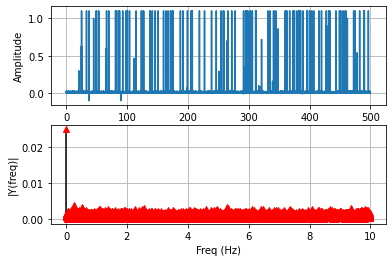

In [ ]:
fig, ax = plt.subplots(2, 1)
ax[0].plot(t, y)
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Amplitude')
ax[0].grid(True)
ax[1].plot(freq, abs(Y), 'r', linestyle=' ', marker='^') 
ax[1].set_xlabel('Freq (Hz)')
ax[1].set_ylabel('|Y(freq)|')
ax[1].vlines(freq, [0], abs(Y))
ax[1].grid(True)
plt.show()

(-0.0002, 0.004)

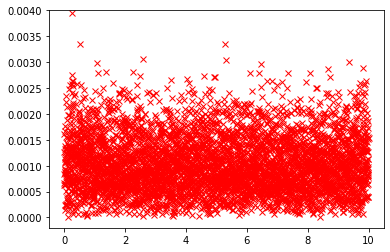

In [ ]:
plt.plot(freq, abs(Y), 'r', linestyle=' ', marker='x') 
plt.ylim(-0.0002, 0.004)

# 50개 - -0.1 < X1 < 0.1 - FFT

In [ ]:
tmp = df.scaled[:50]

In [ ]:
y = tmp.values

Ts = 0.05
Fs = 1/Ts
t = np.arange(0.0, len(tmp)*0.05, 0.05)

n = len(tmp)
k = np.arange(n)
T = n/Fs
freq = k/T
freq = freq[range(int(n/2))]

Y = np.fft.fft(y)/n
Y = Y[range(int(n/2))]

(-0.01, 0.01)

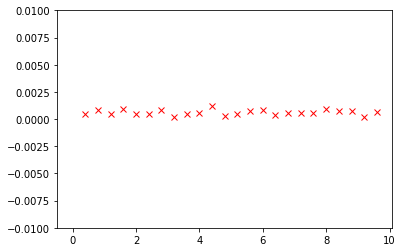

In [ ]:
plt.plot(freq, abs(Y), 'r', linestyle=' ', marker='x') 
plt.ylim(-0.01, 0.01)

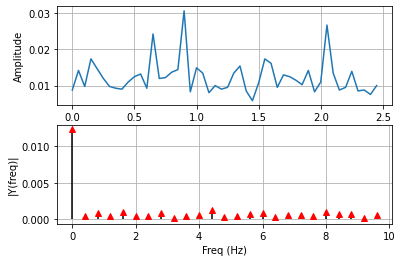

In [ ]:
fig, ax = plt.subplots(2, 1)
ax[0].plot(t, y)
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Amplitude')
ax[0].grid(True)
ax[1].plot(freq, abs(Y), 'r', linestyle=' ', marker='^') 
ax[1].set_xlabel('Freq (Hz)')
ax[1].set_ylabel('|Y(freq)|')
ax[1].vlines(freq, [0], abs(Y))
ax[1].grid(True)
plt.show()

# FFT


In [ ]:
df=pd.read_csv('/content/drive/My Drive/2020_AI_Busan/5_FinalProjectData/BearingAccData/LogData_10000.csv', index_col=0 )
df.head()

,X1,Y1,Z1,X2,Y2,Z2
0,0.008789,-0.030029,1.103027,-0.015686,-0.015686,-0.015686
1,0.014160,-0.039062,1.109131,-0.015686,-0.015686,-0.015686
2,0.009766,-0.029541,1.084961,-0.015686,-0.015686,-0.015686
3,0.017334,-0.035400,1.098145,-0.015686,-0.015686,-0.015686
4,0.014648,-0.035645,1.091797,-0.015686,-0.015686,-0.015686


In [ ]:
y = df.X1.values

Ts = 0.05
Fs = 1/Ts
t = np.arange(0.0, len(df.X1)*0.05, 0.05)

n = len(df.X1)
k = np.arange(n)
T = n/Fs
freq = k/T
# freq = freq[range(int(n/2))]

Y = np.fft.fft(y)/n
# Y = Y[range(int(n/2))]

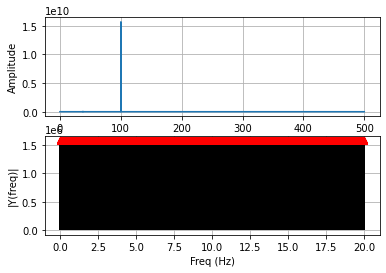

In [ ]:
fig, ax = plt.subplots(2, 1)
ax[0].plot(t, y)
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Amplitude')
ax[0].grid(True)
ax[1].plot(freq, abs(Y), 'r', linestyle=' ', marker='^') 
ax[1].set_xlabel('Freq (Hz)')
ax[1].set_ylabel('|Y(freq)|')
ax[1].vlines(freq, [0], abs(Y))
ax[1].grid(True)
plt.show()

In [ ]:
abs_df = pd.DataFrame(abs(Y))
abs_df.columns = ['Freq']
abs_df

,Freq
0,1.574640e+06
1,1.572849e+06
2,1.568623e+06
3,1.564372e+06
4,1.562605e+06
...,...
9995,1.564342e+06
9996,1.562605e+06
9997,1.564372e+06
9998,1.568623e+06


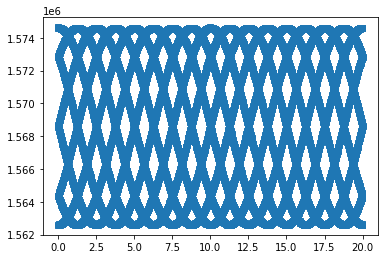

In [ ]:
plt.plot(freq, abs(Y), linestyle=' ', marker='s') 

## FFT - 예측

In [ ]:
# 결측치 확인
abs_df.isnull().sum()

Freq    0
dtype: int64

In [ ]:
# 학습데이터 80%
train_size = int(len(abs_df['Freq']) * 0.8)
# 테스트데이터 나머지20%
test_size = len(abs_df['Freq']) - train_size
train, test = abs_df['Freq'].iloc[0:train_size], abs_df['Freq'].iloc[train_size:]
print(len(train), len(test))

8000 2000


In [ ]:
train.shape, test.shape

((8000,), (2000,))

In [ ]:
train

0       1.574640e+06
1       1.572849e+06
2       1.568623e+06
3       1.564372e+06
4       1.562605e+06
            ...     
7995    1.569591e+06
7996    1.573475e+06
7997    1.574518e+06
7998    1.572131e+06
7999    1.567667e+06
Name: Freq, Length: 8000, dtype: float64

In [ ]:
test

8000    1.563748e+06
8001    1.562663e+06
8002    1.565060e+06
8003    1.569534e+06
8004    1.573446e+06
            ...     
9995    1.564342e+06
9996    1.562605e+06
9997    1.564372e+06
9998    1.568623e+06
9999    1.572849e+06
Name: Freq, Length: 2000, dtype: float64

In [ ]:
test.index = range(len(test))
test

0       1.563748e+06
1       1.562663e+06
2       1.565060e+06
3       1.569534e+06
4       1.573446e+06
            ...     
1995    1.564342e+06
1996    1.562605e+06
1997    1.564372e+06
1998    1.568623e+06
1999    1.572849e+06
Name: Freq, Length: 2000, dtype: float64

In [ ]:
# 데이터 세팅함수
def create_dataset(X, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)]
        Xs.append(v)        
        ys.append(X[i+time_steps])
        # y는 time_step 다음 값으로 설정
    return np.array(Xs), np.array(ys)

In [ ]:
time_steps = 40

X_train, y_train = create_dataset(train, time_steps)
X_test, y_test = create_dataset(test, time_steps)

print(X_train.shape, y_train.shape)

(7960, 40) (7960,)


In [ ]:
# LSTM이 요구하는 shape으로 변경
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_train.shape

(7960, 40, 1)

In [ ]:
model = keras.Sequential()
model.add(keras.layers.LSTM(128, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(keras.layers.Dense(1))
model.compile(loss='mean_squared_error', optimizer=keras.optimizers.Adam(0.001))

In [ ]:
history = model.fit(
    X_train, y_train, 
    epochs=30,
    batch_size=20, 
    validation_split=0.1, 
    verbose=1, 
    shuffle=False
)

Epoch 1/30
359/359 [==============================] - 2s 6ms/step - loss: 2460529197056.0000 - val_loss: 2460539158528.0000
Epoch 2/30
359/359 [==============================] - 2s 5ms/step - loss: 2460497215488.0000 - val_loss: 2460509536256.0000
Epoch 3/30
359/359 [==============================] - 2s 5ms/step - loss: 2460470214656.0000 - val_loss: 2460479389696.0000
Epoch 4/30
359/359 [==============================] - 2s 5ms/step - loss: 2460438233088.0000 - val_loss: 2460449767424.0000
Epoch 5/30
359/359 [==============================] - 2s 5ms/step - loss: 2460409659392.0000 - val_loss: 2460419883008.0000
Epoch 6/30
359/359 [==============================] - 2s 5ms/step - loss: 2460379774976.0000 - val_loss: 2460389736448.0000
Epoch 7/30
359/359 [==============================] - 2s 5ms/step - loss: 2460349890560.0000 - val_loss: 2460360376320.0000
Epoch 8/30
359/359 [==============================] - 2s 5ms/step - loss: 2460320268288.0000 - val_loss: 2460330754048.0000
Epoch 9/

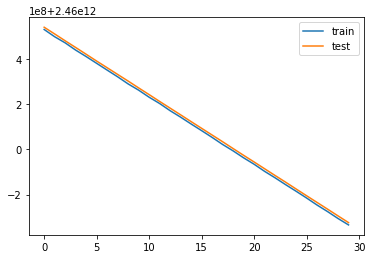

In [ ]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

In [ ]:
# reshape필요
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
y_pred = model.predict(X_test)

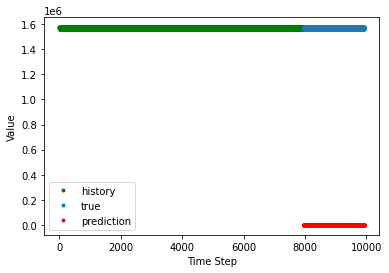

In [ ]:
# 예측값 실제값 그래프 확인
plt.plot(np.arange(0, len(y_train)), y_train, 'g', linestyle=' ', marker='.', label="history")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test, linestyle=' ', marker='.', label="true")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred, 'r', linestyle=' ', marker='.', label="prediction")
plt.ylabel('Value')
plt.xlabel('Time Step')
plt.legend()
plt.show();

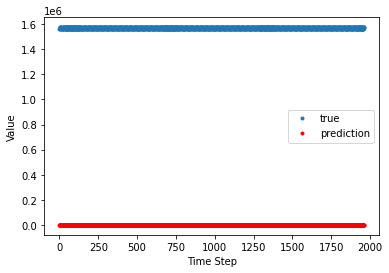

In [ ]:
# 예측값과 실제값 비교
plt.plot(y_test, linestyle=' ', marker='.', label="true")
plt.plot(y_pred, 'r', linestyle=' ', marker='.', label="prediction")
plt.ylabel('Value')
plt.xlabel('Time Step')
plt.legend()
plt.show()

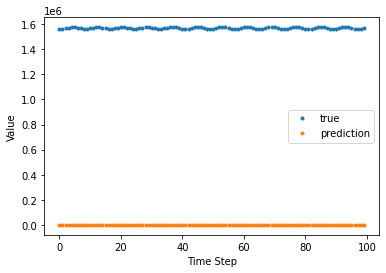

In [ ]:
# 더 확대
plt.plot(y_test[:100], linestyle=' ', marker='.', label="true")
plt.plot(y_pred[:100], linestyle=' ', marker='.', label="prediction")
plt.ylabel('Value')
plt.xlabel('Time Step')
plt.legend()
plt.show()

## Scaling 후 예측 수행


In [ ]:
df=pd.read_csv('/content/drive/My Drive/2020_AI_Busan/5_FinalProjectData/BearingAccData_Normal/Normal.csv' )
df.head()

,Normal
0,-0.049316
1,-0.019775
2,-0.045898
3,-0.059082
4,-0.036377


In [ ]:
y = df.Normal.values

Ts = 0.05
Fs = 1/Ts
t = np.arange(0.0, len(df.Normal)*0.05, 0.05)

n = len(df.Normal)
k = np.arange(n)
T = n/Fs
freq = k/T
# freq = freq[range(int(n/2))]

Y = np.fft.fft(y)/n
# Y = Y[range(int(n/2))]

abs_df = pd.DataFrame(abs(Y))
abs_df.columns = ['Freq']
abs_df

,Freq
0,0.033055
1,0.000311
2,0.000402
3,0.000143
4,0.000267
...,...
101820,0.000162
101821,0.000267
101822,0.000143
101823,0.000402


In [ ]:
scaler = MinMaxScaler().fit(abs_df)

In [ ]:
abs_df = scaler.transform(abs_df)
print(abs_df)

[[1.        ]
 [0.00936273]
 [0.01214157]
 ...
 [0.0042988 ]
 [0.01214157]
 [0.00936273]]


In [ ]:
stats.describe(abs_df)

DescribeResult(nobs=101825, minmax=(array([0.]), array([1.])), mean=array([0.00714753]), variance=array([2.36592141e-05]), skewness=array([83.80800335]), kurtosis=array([17046.883484]))

In [ ]:
abs_df = pd.DataFrame(abs_df)
abs_df.columns=['Freq']
abs_df

,Freq
0,1.000000
1,0.009363
2,0.012142
3,0.004299
4,0.008037
...,...
101820,0.004857
101821,0.008037
101822,0.004299
101823,0.012142


In [ ]:
# 학습데이터 80%
train_size = int(len(abs_df['Freq']) * 0.8)
# 테스트데이터 나머지20%
test_size = len(abs_df['Freq']) - train_size
train, test = abs_df['Freq'].iloc[0:train_size], abs_df['Freq'].iloc[train_size:]
print(len(train), len(test))

81460 20365


In [ ]:
test.index = range(len(test))

In [ ]:
time_steps = 40

X_train, y_train = create_dataset(train, time_steps)
X_test, y_test = create_dataset(test, time_steps)

print(X_train.shape, y_train.shape)

(81420, 40) (81420,)


In [ ]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_train.shape

(81420, 40, 1)

In [ ]:
model = keras.Sequential()
model.add(keras.layers.LSTM(128, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(keras.layers.Dense(1))
model.compile(loss='mean_squared_error', optimizer=keras.optimizers.Adam(0.001))

In [ ]:
history = model.fit(
    X_train, y_train, 
    epochs=100,
    batch_size=20, 
    validation_split=0.1, 
    verbose=1, 
    shuffle=False
)

Epoch 1/100
3664/3664 [==============================] - 17s 5ms/step - loss: 1.4582e-05 - val_loss: 1.4760e-05
Epoch 2/100
3664/3664 [==============================] - 16s 4ms/step - loss: 1.4343e-05 - val_loss: 1.4905e-05
Epoch 3/100
3664/3664 [==============================] - 16s 4ms/step - loss: 1.4333e-05 - val_loss: 1.4884e-05
Epoch 4/100
3664/3664 [==============================] - 17s 5ms/step - loss: 1.4332e-05 - val_loss: 1.4709e-05
Epoch 5/100
3664/3664 [==============================] - 16s 4ms/step - loss: 1.4334e-05 - val_loss: 1.4739e-05
Epoch 6/100
3664/3664 [==============================] - 16s 4ms/step - loss: 1.4335e-05 - val_loss: 1.4837e-05
Epoch 7/100
3664/3664 [==============================] - 16s 4ms/step - loss: 1.4341e-05 - val_loss: 1.4722e-05
Epoch 8/100
3664/3664 [==============================] - 16s 4ms/step - loss: 1.4341e-05 - val_loss: 1.4757e-05
Epoch 9/100
3664/3664 [==============================] - 16s 4ms/step - loss: 1.4334e-05 - val_loss: 1.4

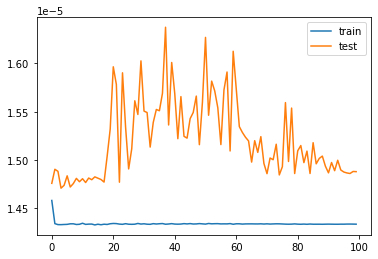

In [ ]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

In [ ]:
# reshape필요
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
y_pred = model.predict(X_test)

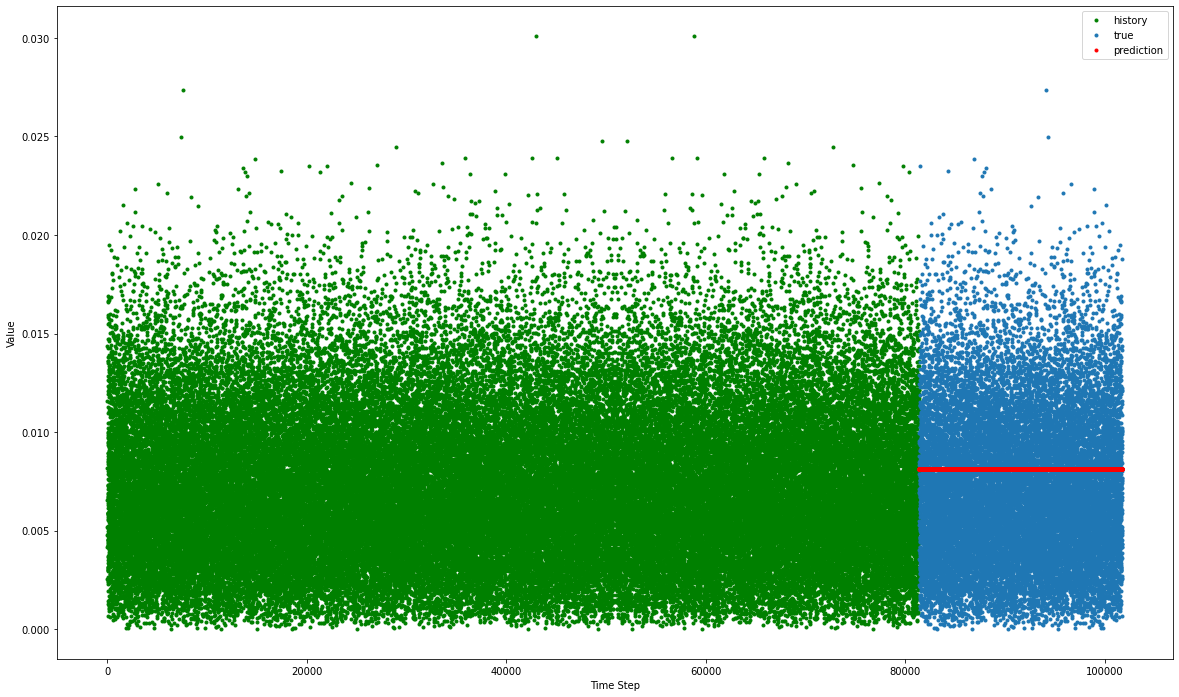

In [ ]:
# 예측값 실제값 그래프 확인
plt.figure(figsize=(20,12))
plt.plot(np.arange(0, len(y_train)), y_train, 'g', linestyle=' ', marker='.', label="history")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test, linestyle=' ', marker='.', label="true")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred, 'r', linestyle=' ', marker='.', label="prediction")
plt.ylabel('Value')
plt.xlabel('Time Step')
plt.legend()
plt.show()

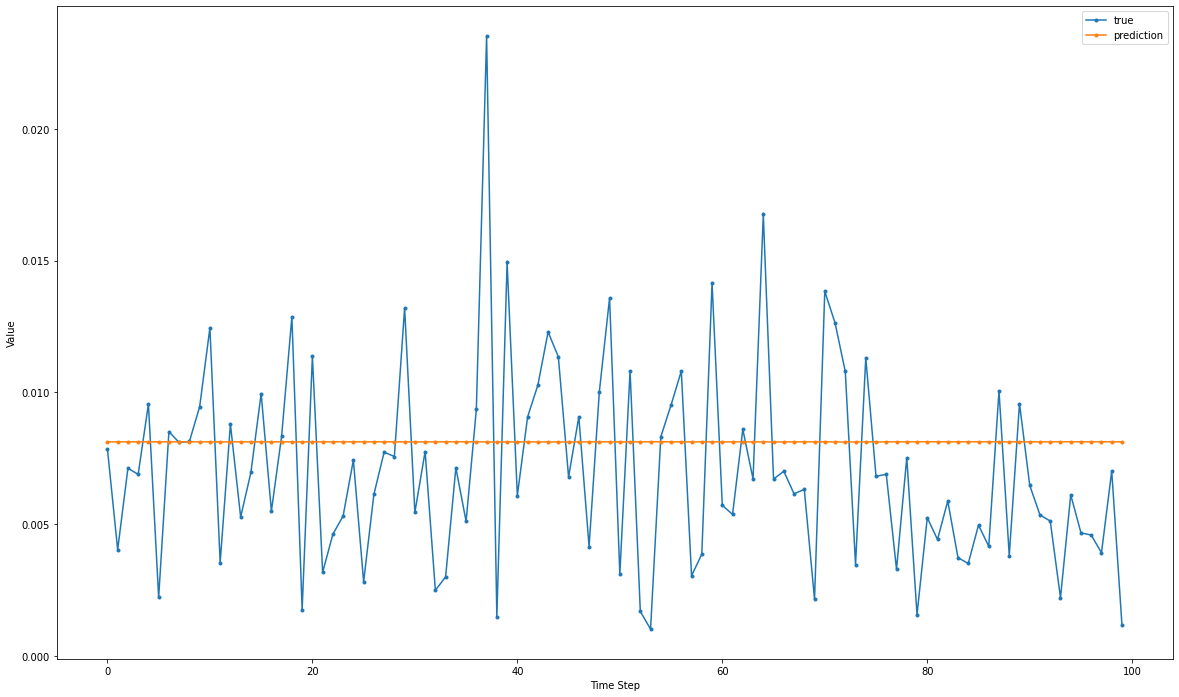

In [ ]:
# 더 확대
plt.figure(figsize=(20,12))
plt.plot(y_test[:100], marker='.', label="true")
plt.plot(y_pred[:100], marker='.', label="prediction")
plt.ylabel('Value')
plt.xlabel('Time Step')
plt.legend()
plt.show()

In [ ]:
model.evaluate(X_test, y_test, batch_size=20)

1017/1017 [==============================] - 2s 2ms/step - loss: 1.4924e-05


1.4924295101081952e-05

# 50개 - FFT

In [ ]:
df=pd.read_csv('/content/drive/My Drive/2020_AI_Busan/5_FinalProjectData/BearingAccData/LogData_10000.csv', index_col=0 )
df.head()

,X1,Y1,Z1,X2,Y2,Z2
0,0.008789,-0.030029,1.103027,-0.015686,-0.015686,-0.015686
1,0.014160,-0.039062,1.109131,-0.015686,-0.015686,-0.015686
2,0.009766,-0.029541,1.084961,-0.015686,-0.015686,-0.015686
3,0.017334,-0.035400,1.098145,-0.015686,-0.015686,-0.015686
4,0.014648,-0.035645,1.091797,-0.015686,-0.015686,-0.015686


In [ ]:
tmp = df.X1[:50]

In [ ]:
y = tmp.values

Ts = 0.05
Fs = 1/Ts
t = np.arange(0.0, len(tmp)*0.05, 0.05)

n = len(tmp)
k = np.arange(n)
T = n/Fs
freq = k/T
freq = freq[range(int(n/2))]

Y = np.fft.fft(y)/n
Y = Y[range(int(n/2))]

In [ ]:
abs_df = pd.DataFrame(abs(Y))
abs_df.columns = ['Freq']
abs_df

,Freq
0,0.012310
1,0.000463
2,0.000849
3,0.000512
4,0.000951
5,0.000498
6,0.000472
7,0.000871
8,0.000171
9,0.000488


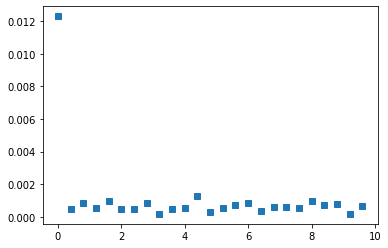

In [ ]:
plt.plot(freq, abs(Y), linestyle=' ', marker='s') 

# -0.1 < X1 < 0.1 - 나머지값은 0으로

In [ ]:
# ZeroDotOne - 절대값 0.1 넘는 값은 0으로 처리
ScaledZDO=df.X1.map(lambda x : 0 if abs(x) > 0.1 else x)
ScaledZDO

0       0.008789
1       0.014160
2       0.009766
3       0.017334
4       0.014648
          ...   
9995    0.012695
9996    0.005615
9997    0.004150
9998    0.014893
9999    0.016113
Name: X1, Length: 10000, dtype: float64

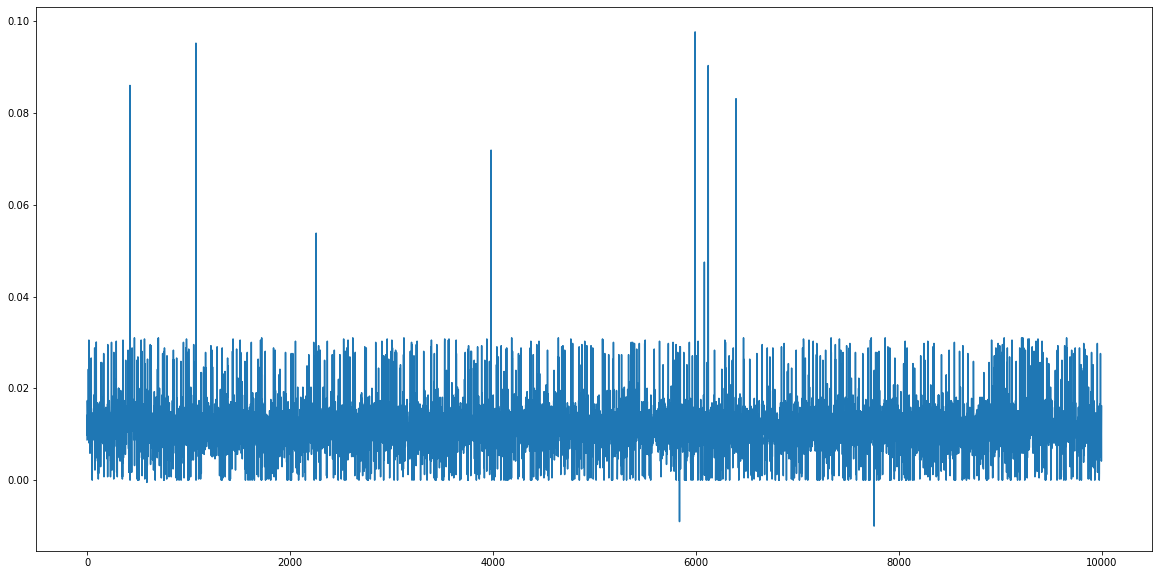

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(ScaledZDO)
plt.show()

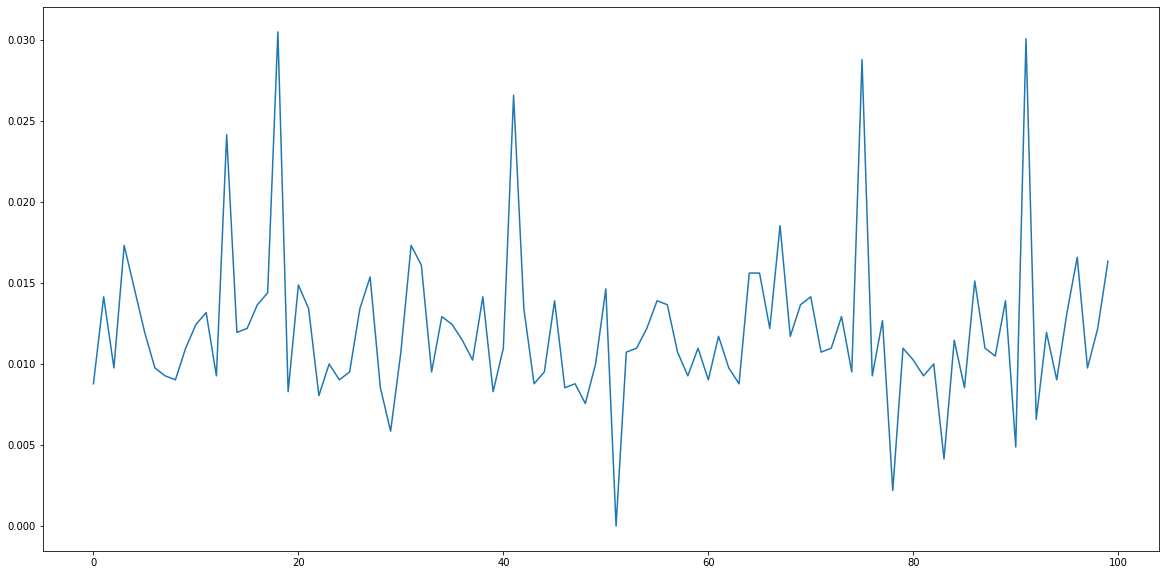

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(ScaledZDO[:100])
plt.show()

In [ ]:
# 학습:훈련 = 8:2
train_size = int(len(ScaledZDO) * 0.8)

train, test = ScaledZDO.iloc[0:train_size], ScaledZDO.iloc[train_size:]
print(len(train), len(test))

8000 2000


In [ ]:
# test 인덱스 변경
test.index = range(len(test))

In [ ]:
# 데이터 세팅함수
def create_dataset(X, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)]
        Xs.append(v)        
        ys.append(X[i+time_steps])
        # y는 time_step 다음 값으로 설정
    return np.array(Xs), np.array(ys)

In [ ]:
time_steps = 40

X_train, y_train = create_dataset(train, time_steps)
X_test, y_test = create_dataset(test, time_steps)

print(X_train.shape, y_train.shape)

(7960, 40) (7960,)


In [ ]:
# LSTM이 요구하는 shape으로 변경
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_train.shape

(7960, 40, 1)

In [ ]:
model = keras.Sequential()
model.add(keras.layers.LSTM(128, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(keras.layers.Dense(1))
model.compile(loss='mean_squared_error', optimizer=keras.optimizers.Adam(0.001))

In [ ]:
history = model.fit(
    X_train, y_train, 
    epochs=30,  # epoch 30, 100 시도 -> 별 차이 없음
    batch_size=20, 
    validation_split=0.1, 
    verbose=1, 
    shuffle=False
)

Epoch 1/30
359/359 [==============================] - 2s 5ms/step - loss: 3.5478e-05 - val_loss: 2.7319e-05
Epoch 2/30
359/359 [==============================] - 1s 4ms/step - loss: 3.3374e-05 - val_loss: 2.7663e-05
Epoch 3/30
359/359 [==============================] - 1s 4ms/step - loss: 3.3189e-05 - val_loss: 2.7284e-05
Epoch 4/30
359/359 [==============================] - 1s 4ms/step - loss: 3.3077e-05 - val_loss: 2.7703e-05
Epoch 5/30
359/359 [==============================] - 1s 4ms/step - loss: 3.2835e-05 - val_loss: 2.7882e-05
Epoch 6/30
359/359 [==============================] - 1s 4ms/step - loss: 3.2712e-05 - val_loss: 2.7780e-05
Epoch 7/30
359/359 [==============================] - 1s 4ms/step - loss: 3.2641e-05 - val_loss: 2.7634e-05
Epoch 8/30
359/359 [==============================] - 1s 4ms/step - loss: 3.2586e-05 - val_loss: 2.7506e-05
Epoch 9/30
359/359 [==============================] - 1s 4ms/step - loss: 3.2566e-05 - val_loss: 2.7402e-05
Epoch 10/30
359/359 [=======

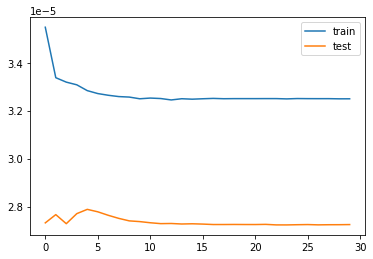

In [ ]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

In [ ]:
# reshape필요
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
y_pred = model.predict(X_test)

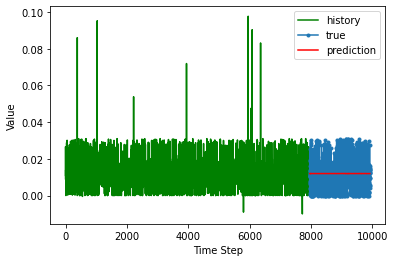

In [ ]:
# 예측값 실제값 그래프 확인
plt.plot(np.arange(0, len(y_train)), y_train, 'g', label="history")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test, marker='.', label="true")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred, 'r', label="prediction")
plt.ylabel('Value')
plt.xlabel('Time Step')
plt.legend()
plt.show()

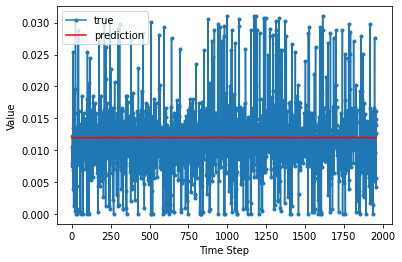

In [ ]:
# 예측값과 실제값 비교
plt.plot(y_test, marker='.', label="true")
plt.plot(y_pred, 'r', label="prediction")
plt.ylabel('Value')
plt.xlabel('Time Step')
plt.legend()
plt.show()

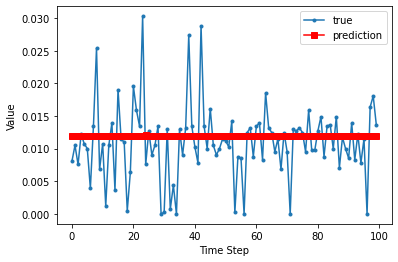

In [ ]:
# 더 확대
plt.plot(y_test[:100], marker='.', label="true")
plt.plot(y_pred[:100], 'r', marker='s', label="prediction")
plt.ylabel('Value')
plt.xlabel('Time Step')
plt.legend()
plt.show()

In [ ]:
y_pred

array([[0.01196852],
       [0.01196527],
       [0.01196724],
       ...,
       [0.01197164],
       [0.01196032],
       [0.01197076]], dtype=float32)

# LobData_10000 ~ 50000 사용

In [ ]:
df1 = pd.read_csv('/content/drive/My Drive/2020_AI_Busan/5_FinalProjectData/BearingAccData/LogData_10000.csv', index_col=0 )
df1 = pd.DataFrame(df1)
df2 = pd.read_csv('/content/drive/My Drive/2020_AI_Busan/5_FinalProjectData/BearingAccData/LogData_10000.csv', index_col=0 )
df2 = pd.DataFrame(df2)
df3 = pd.read_csv('/content/drive/My Drive/2020_AI_Busan/5_FinalProjectData/BearingAccData/LogData_10000.csv', index_col=0 )
df3 = pd.DataFrame(df3)
df4 = pd.read_csv('/content/drive/My Drive/2020_AI_Busan/5_FinalProjectData/BearingAccData/LogData_10000.csv', index_col=0 )
df4 = pd.DataFrame(df4)
df5 = pd.read_csv('/content/drive/My Drive/2020_AI_Busan/5_FinalProjectData/BearingAccData/LogData_10000.csv', index_col=0 )
df5 = pd.DataFrame(df5)

In [ ]:
df = pd.concat([df1,df2,df3,df4,df5])
df

,X1,Y1,Z1,X2,Y2,Z2
0,0.008789,-0.030029,1.103027,-0.015686,-0.015686,-0.015686
1,0.014160,-0.039062,1.109131,-0.015686,-0.015686,-0.015686
2,0.009766,-0.029541,1.084961,-0.015686,-0.015686,-0.015686
3,0.017334,-0.035400,1.098145,-0.015686,-0.015686,-0.015686
4,0.014648,-0.035645,1.091797,-0.015686,-0.015686,-0.015686
...,...,...,...,...,...,...
9995,0.012695,-0.036133,1.106934,-0.015686,-0.015686,-0.015686
9996,0.005615,-0.033936,1.083008,-0.015686,-0.015686,-0.015686
9997,0.004150,-0.038330,1.100342,-0.015686,-0.015686,-0.015686
9998,0.014893,-0.040283,1.081787,-0.015686,-0.015686,-0.015686


In [ ]:
# ZeroDotOne - 절대값 0.1 넘는 값은 0으로 처리
ScaledZDO58 = df58.X1.map(lambda x : 0 if abs(x) > 0.1 else x)
ScaledZDO58

# 58개 데이터 concat하려면 로컬에서 돌려야 됨. 코랩에서 돌리면 RAM 터짐.

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(ScaledZDO58)
plt.show()